In [1]:
import numpy as np
import matplotlib.pyplot as plt
from zernike import RZern

In [2]:
r = np.linspace(0, 1, 100)
cart = RZern(50)
_ = cart.Rnm(1000, r)

In [3]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../FastZernike/"))

from zernipax.basis import ZernikePolynomial
from zernipax.zernike import *
from zernipax.plotting import plot_comparison

import mpmath
import matplotlib

using JAX backend, jax version=0.4.28, jaxlib version=0.4.28, dtype=float64
Using device: CPU, with 6.41 GB available memory


In [8]:
res = 50
basis = ZernikePolynomial(L=res, M=res, spectral_indexing="ansi", sym="cos")
ms = basis.modes[:,1]
ns = basis.modes[:,0]
r = np.linspace(0, 1, 100)
all_zernipax = zernike_radial(r, basis.modes[:,0], basis.modes[:,1], 0)

In [9]:
def get_Noll(n, m):
    j = n*(n+1)//2 + abs(m)
    if m >= 0 and (n%4 == 2 or n%4 == 3):
        j += 1
    elif m <= 0 and (n%4 == 0 or n%4 == 1):
        j += 1
    return j

def fun():
    all = []
    cart = RZern(int(max(ns)))
    for i in range(len(ms)):
        id_Noll = get_Noll(ns[i], ms[i]) - 1
        all.append(cart.Rnm(id_Noll, r))

    return np.array(all)

all_zernike = fun().T

In [12]:
# Exact computation
mpmath.mp.dps = 100
def fun2():
    c = zernike_radial_coeffs(basis.modes[:, 0], basis.modes[:, 1], exact=True)
    zt0 = np.array([np.asarray(mpmath.polyval(list(ci), r), dtype=float) for ci in c]).T
    return zt0

zt0 = fun2()

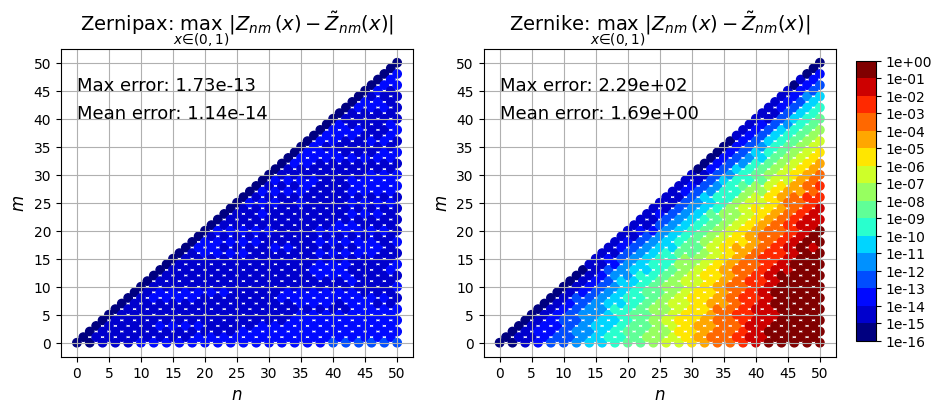

In [13]:
plot_comparison(zt0, (all_zernipax, all_zernike), basis, 0, "absolute", names=("Zernipax:", "Zernike:"), print_error=True)